# Lasso Regression
1. Supervised Learning Model
2. Regression Model
3. LASSO stand from(Least Absolute Shrinkage & Selection Operator)
4. Implements Reglarization(L1) to avoid Overfitting
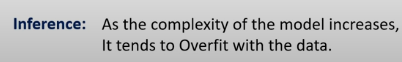
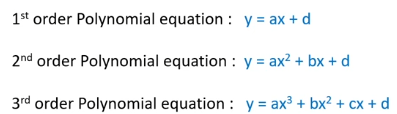   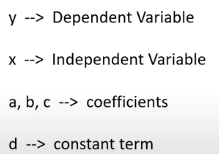

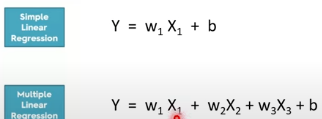

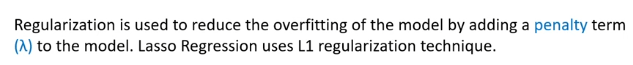
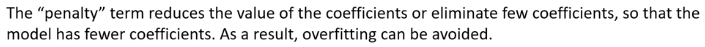 

this process is also known as Shrinkage . 

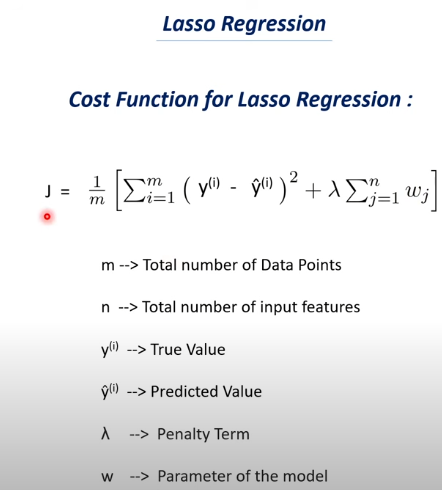


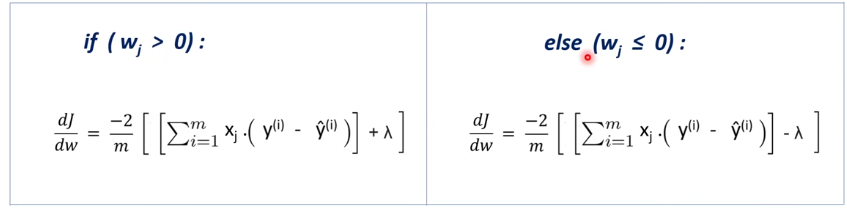

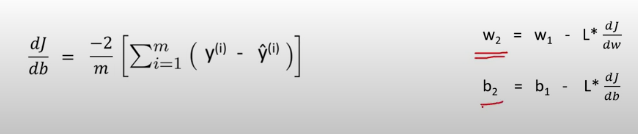

In [1]:
# import the ibrary 
import numpy as np

In [7]:
class Lasso_Regression():

    # Initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    # Fitting the dataset to the Lasso Regression model
    def fit(self, X, Y):

        # number of Data points --> number of rows(m) & number of columns(n)
       
        self.m, self.n = X.shape

        self.w = np.zeros(self.n)

        self.b = 0

        self.X = X

        self.Y = Y

        # Implementing Gradient Descent algorithm for Optimization

        for i in range(self.no_of_iterations):
            self.update_weights()

    # Function for updating the weight & bias value
    def update_weights(self):

        # Linear equation of the model
        Y_prediction = self.predict(self.X)

        # Gradients (dw, db)

        # Gradient for weight
        dw = np.zeros(self.n)

        for i in range(self.n):

            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

        # Gradient for bias
        db = -2 * np.sum(self.Y - Y_prediction) / self.m

        # Updating the weights & bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Predicting the Target variable
    def predict(self, X):
        return X.dot(self.w) + self.b
